This notebook was prepared by [Clarence Mah][1]. Source and license info is on [GitHub][2].

[1]: http://github.com/ckmah
[2]: http://github.com/ckmah/pokemon-tutorial

# Intro to Python Packages

This a beginner/intermediate level Python tutorial about some of the most popular python packages in data science and scientific analysis.

## Table of Contents

what are ipython notebooks

pandas dataframe indexing, boolean selection
numpy functions

- [1. Import Packages](#section1)
- [2. Explore Data](#section2)
- [3. Plotting](#section3)
- [4. Analysis](#section4)

<a id='section1'></a>

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

%matplotlib inline

<a id='section2'></a>

# Explore Data

Here our data is stored in a `.csv` file. The [`pandas`][1] library is great at handling a variety data formats. Type **`pd.read + TAB`** to explore functions that start with `read`.

[1]: http://pandas.pydata.org/pandas-docs/stable/

In [2]:
pokemon = pd.read_csv('Pokemon.csv')

In [3]:
# Explore pandas functions! Type "pd.read" then press TAB


We're only going to look at first generation Pokemon for the sake of simplicity.

In [3]:
# Exclude Generation != 1 pokemon; Don't worry about this statement
pokemon = pokemon[pokemon.Generation == 1]

What does our data look like?

In [4]:
# Display the first 5 rows with header and row names
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
# Display the last 5 rows
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
165,151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False


How large is my dataset?

In [6]:
# 166 rows, 13 columns
pokemon.shape

(166, 13)

Summary of our data.

In [7]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.0
mean,75.819277,426.813253,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337,1.0
std,45.153246,115.878076,28.153968,30.744727,28.641336,34.439106,25.505275,29.675857,0.0
min,1.000000,195.000000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.0
25%,36.250000,325.000000,46.500000,55.000000,50.000000,45.000000,50.000000,50.000000,1.0
50%,76.500000,436.500000,62.000000,75.000000,66.000000,65.000000,70.000000,70.000000,1.0
75%,115.000000,500.000000,80.000000,95.000000,85.000000,95.000000,85.000000,92.250000,1.0
max,151.000000,780.000000,250.000000,190.000000,180.000000,194.000000,130.000000,150.000000,1.0


In [8]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 165
Data columns (total 13 columns):
#             166 non-null int64
Name          166 non-null object
Type 1        166 non-null object
Type 2        78 non-null object
Total         166 non-null int64
HP            166 non-null int64
Attack        166 non-null int64
Defense       166 non-null int64
Sp. Atk       166 non-null int64
Sp. Def       166 non-null int64
Speed         166 non-null int64
Generation    166 non-null int64
Legendary     166 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 17.0+ KB


<a id='section3'></a>

# Analyze

We can make a [boxplot][1] of single variable (column) using `seaborn`, a visualization package for drawing nice looking graphs. 

Adapted from [Andrew Gele's][2] notebook.

[1]: https://en.wikipedia.org/wiki/Box_plot

[2]: https://www.kaggle.com/ndrewgele/d/abcsds/pokemon/visualizing-pok-mon-stats-with-seaborn`

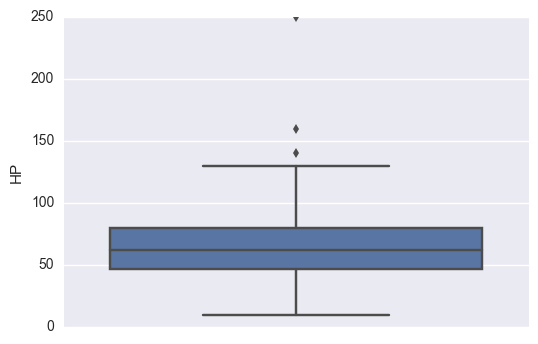

In [9]:
sns.boxplot(pokemon.HP, orient='v');

Even better, `seaborn` can automatically make a boxplot for each variable out of the box.

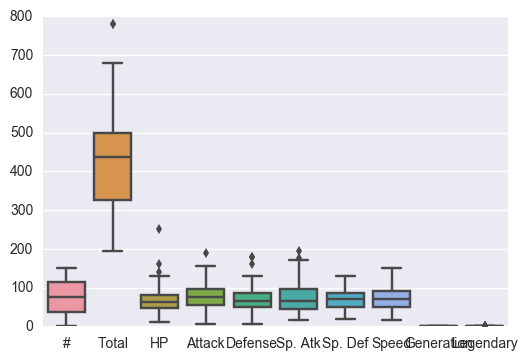

In [10]:
sns.boxplot(data=pokemon);

Since we only want to look at their stats, some variables are irrelevant. Let's exclude those for now.

In [11]:
pokemon = pokemon.drop(['#', 'Total', 'Generation', 'Legendary'],axis='columns')

In [12]:
# Notice that we have removed some of the columns
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,NaN,39,52,43,60,50,65


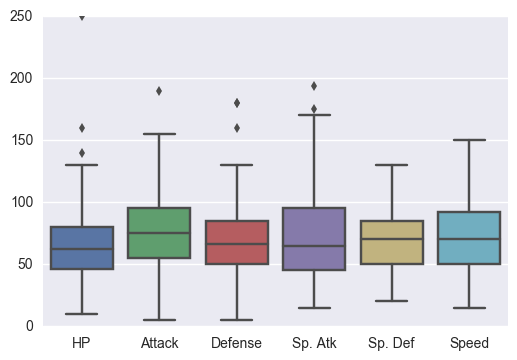

In [14]:
sns.boxplot(data=pokemon);

We can compare Pokemon stats by type. This particular plot, [`swarmplot`][1] requires data transformed in a certain format. Check out pandas' [`melt`][1] for a description of the transformation.

[1]: http://seaborn.pydata.org/generated/seaborn.swarmplot.html
[2]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html

In [15]:
# Transform data for swarmplot
normalized = pd.melt(
    pokemon, id_vars=["Name", "Type 1", "Type 2"], var_name="Stat")

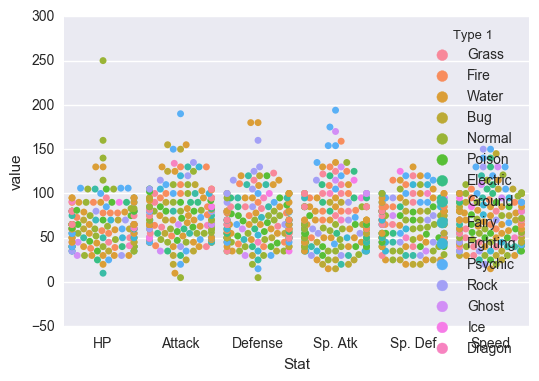

In [16]:
sns.swarmplot(data=normalized, x='Stat', y='value', hue='Type 1');

Using a few Seaborn and Matplotlib functions, we can adjust how our plot looks.
On each line below, we will:
- [Make the plot larger](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure)
- [Adjust the y-axis](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ylim)
- Organize the point distribution by type and make the individual points larger
- [Move the legend out of the way](http://matplotlib.org/users/legend_guide.html#legend-location)

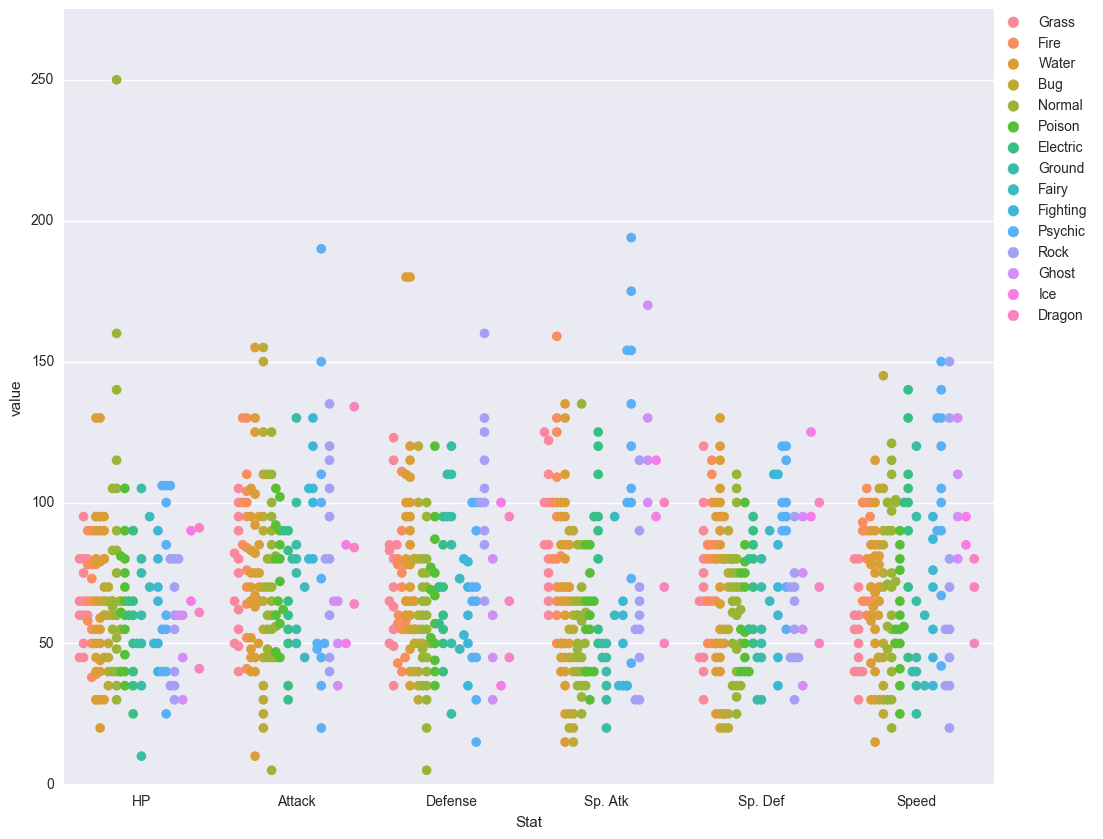

In [17]:
# Make the plot larger
plt.figure(figsize=(12, 10))

# Adjust the y-axis
plt.ylim(0, 275)

# Organize by type [split], make points larger [size]
sns.swarmplot(
    data=normalized, x='Stat', y='value', hue='Type 1', split=True, size=7);

# Move legend out of the way
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

Make it easier to see types...

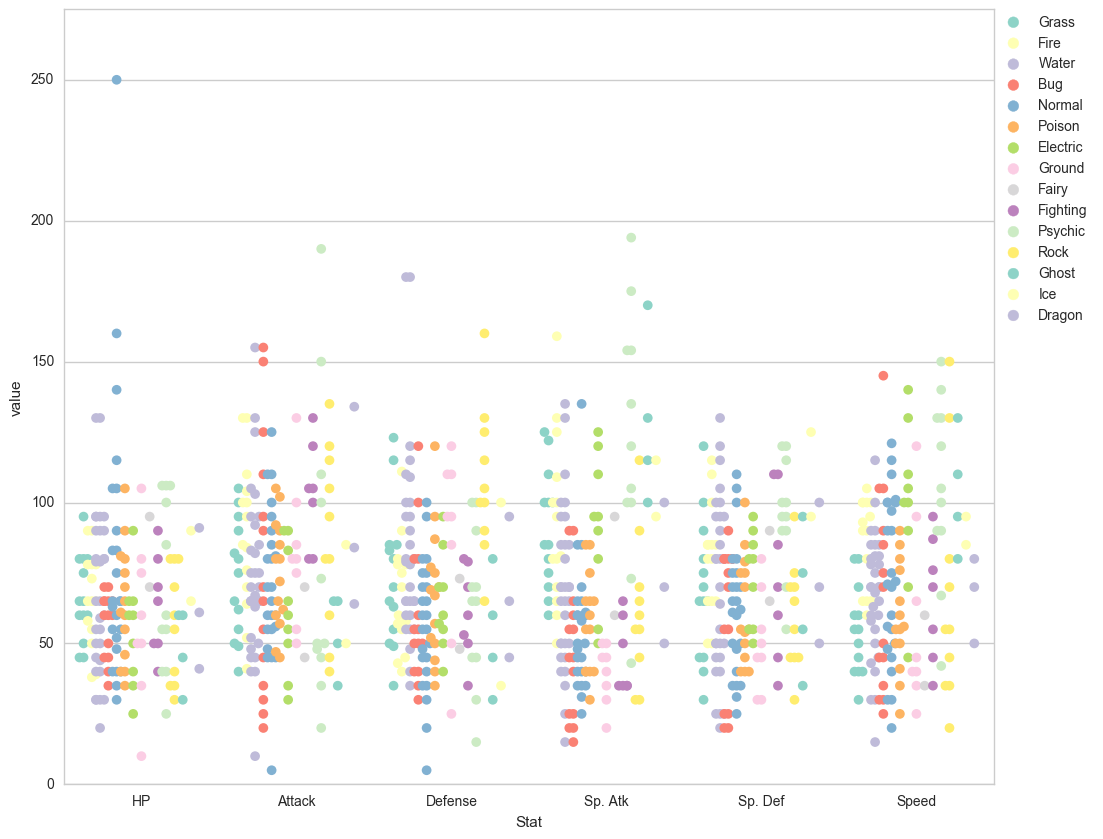

In [36]:
# Set background to white
sns.set_style('whitegrid')

# Make the plot larger
plt.figure(figsize=(12, 10))

# Adjust the y-axis
plt.ylim(0, 275)

# Organize by type [split], make points larger [size]
sns.swarmplot(
    data=normalized,
    x='Stat',
    y='value',
    hue='Type 1',
    split=True,
    size=7,
    palette='Set3');

# Move legend out of the way
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

Compare individual stats across types.

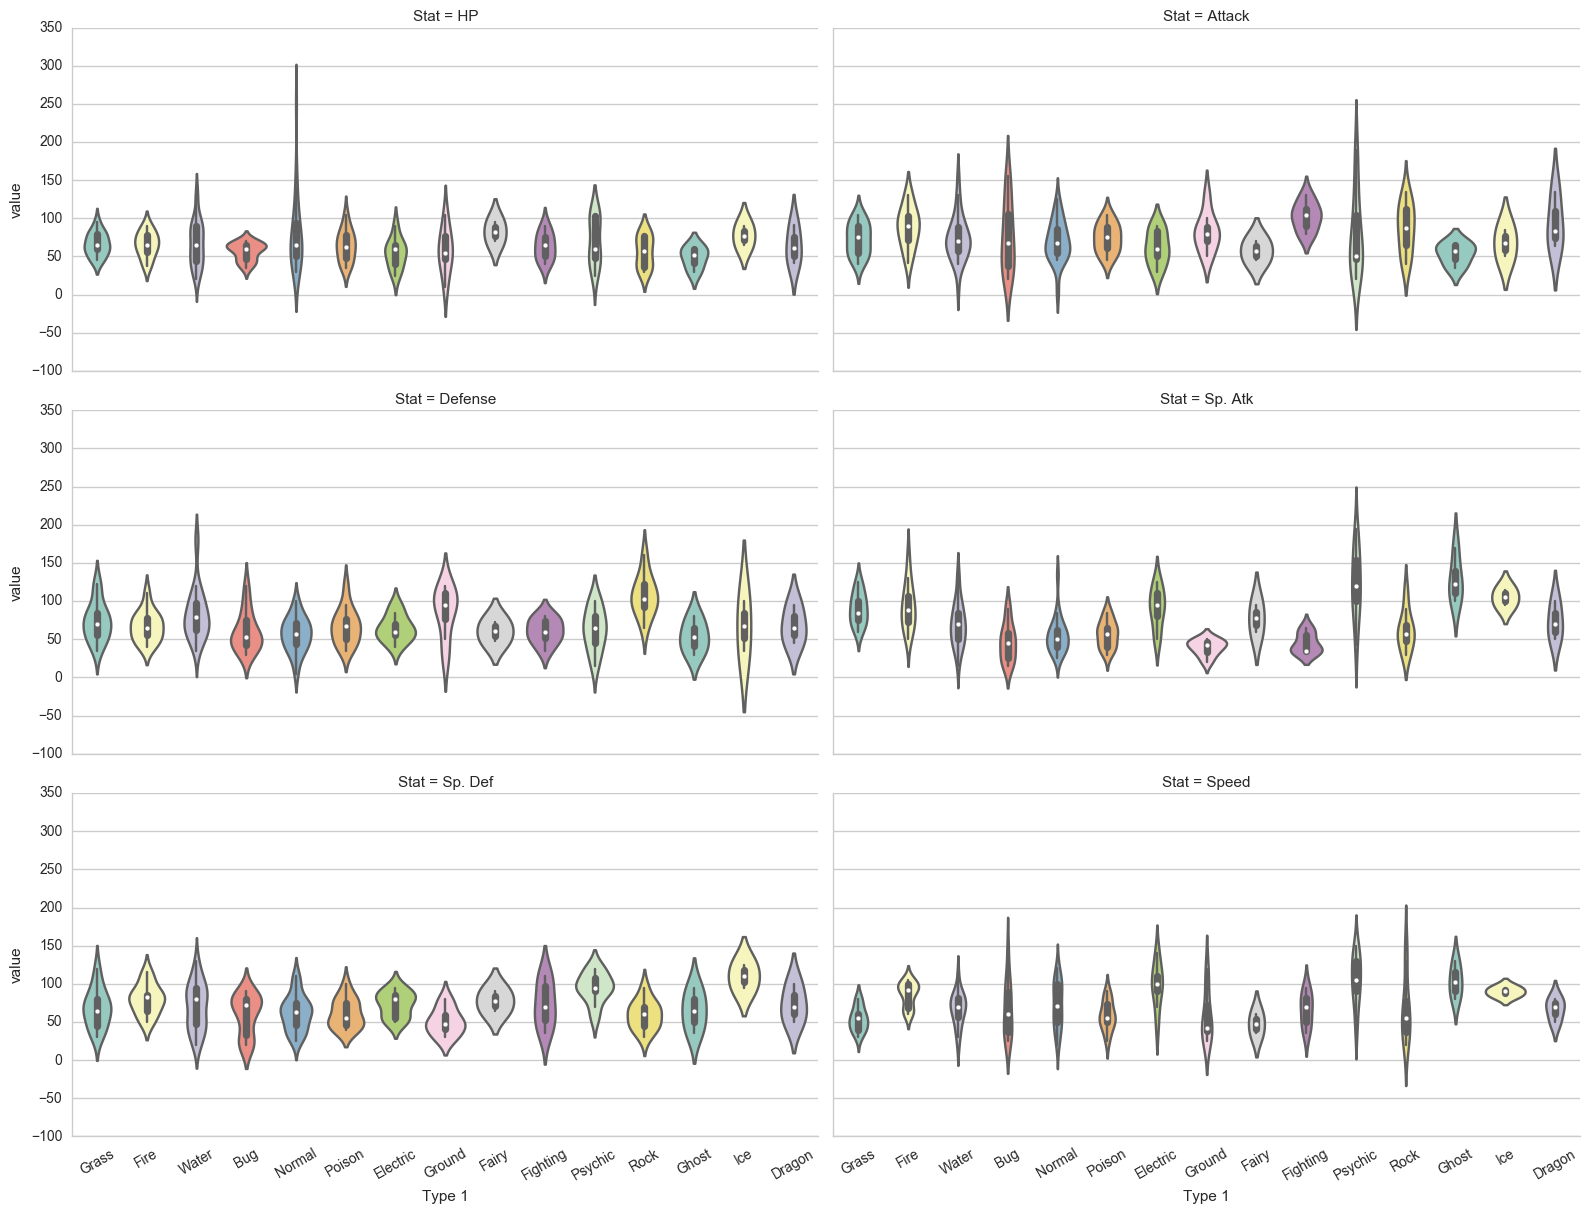

In [31]:
# Compare stats by type
figure = sns.factorplot(
    data=normalized,
    x='Type 1',
    y='value',
    col='Stat',
    col_wrap=2,
    aspect=2,
    kind='violin',
    palette='Set3');

# Rotate x-axis tick labels
figure.set_xticklabels(rotation=30)

<a id="section4"></a>

# Analysis

In [44]:
# reset
pokemon = pd.read_csv('Pokemon.csv')
pokemon = pokemon[pokemon.Generation == 1]

In [45]:
df = pokemon
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
pokemon['id'] = pokemon['#']

In [46]:
# Normalize
scaler = StandardScaler().fit(pokemon[cols])
df_scaled = scaler.transform(pokemon[cols])

In [48]:
pca = PCA(n_components=0.8)
pca.fit(df_scaled)

pcscores = pd.DataFrame(pca.transform(df_scaled))
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

loadings = pd.DataFrame(pca.components_, columns=cols)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

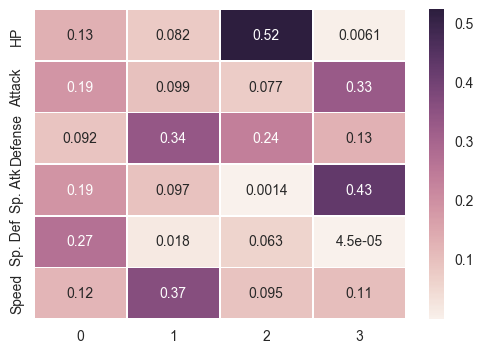

In [49]:
sns.heatmap(pd.DataFrame(pca.components_**2, columns=cols).transpose(), annot=True, linewidths=0.5);

The darkest shades in the plot above indicate which parameters are the most important.

For example, the loading factors for `2` show that HP is the most dominant parameter. That is, Pokemon with high HP will have high absolute values of `2`.

In [50]:
df.sort_values(by='HP', ascending=False).head(n=25)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,id
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,113
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False,143
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False,40
145,134,Vaporeon,Water,NaN,525,130,65,60,110,95,65,1,False,134
142,131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False,131
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False,39
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,150
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,150
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True,150
120,112,Rhydon,Ground,Rock,485,105,130,120,45,45,40,1,False,112


In [52]:
labels = set(df['Type 1'])
df['type'] = df['Type 1']
lab_dict = dict()
for i, elem in enumerate(labels):
    lab_dict[elem] = i
df = df.replace({'type' : lab_dict})

pc_types = pcscores.copy()
pc_types['Type'] = df['Type 1']

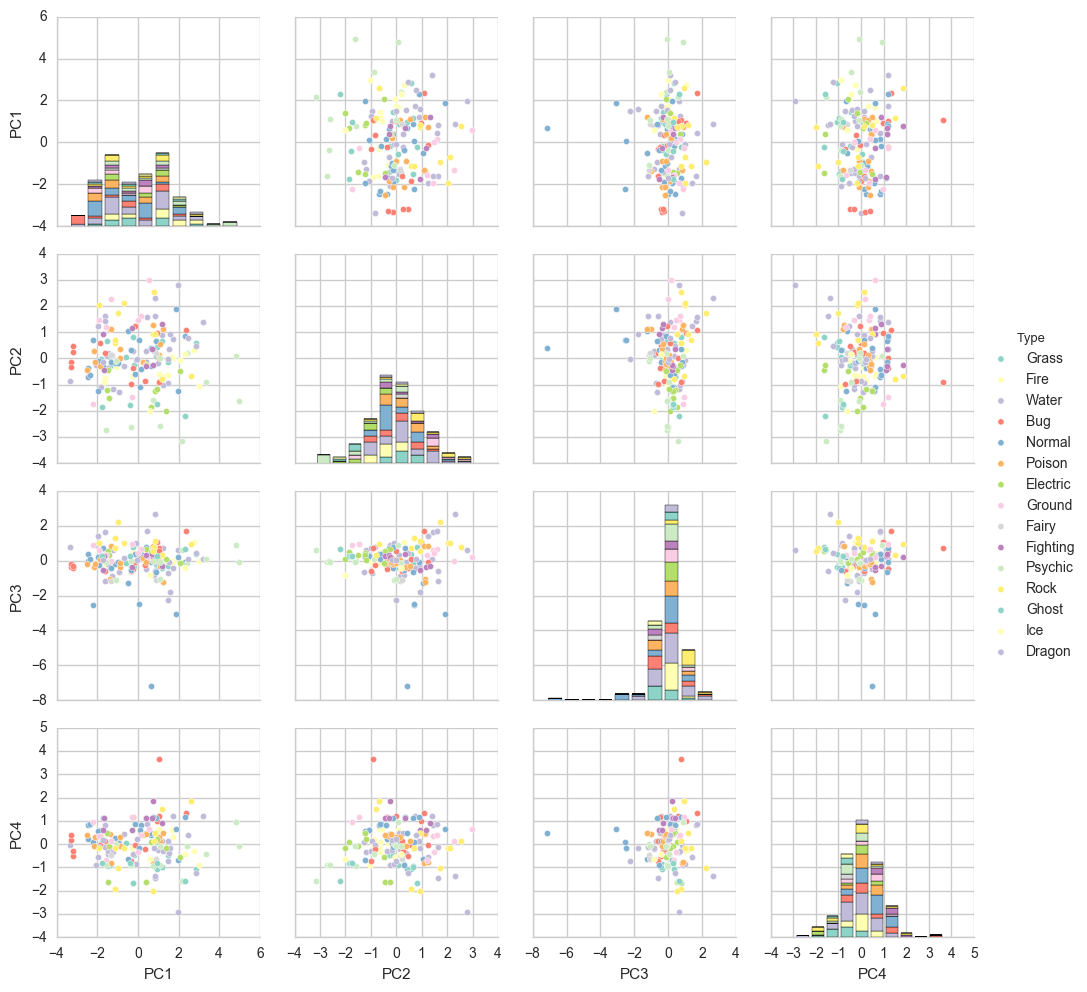

In [57]:
# Set background to white
sns.set_style('whitegrid')

sns.pairplot(pc_types, hue='Type',palette='Set3');